TABLE OF CONTENTS

I -
   - Problem / Data Set Information
   - Importing Libraries
   - Loading Data / Exploratory Data Analysis
   - Correlation between Numeric Variable
   - Relationship between categorical variables and target variable by using chi-square test
   - Visualization
   - Checking missing values in the Dataset
   - Handling missing values
   - Convert Categorical variables into Numerical

II -  Random forest
   - Train Test Split
   - Feature Scaling 
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Tracé de l'importance des features

III -  Decision tree
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Tracé de l'importance des features
   - Comparaison des performances

# I - 

### Problem / Data Set Information

# Prédire la souscription d'un client à un service bancaire avec naive bayes et avec svm (support vector machine)
Les données sont liées aux campagnes de marketing d'une institution bancaire portugaise. Ces campagnes de marketing étaient basées sur des appels téléphoniques. Souvent, plusieurs contacts avec le même client étaient nécessaires pour savoir si le client va souscrire ou non à un service bancaire. 

L'objectif de la classification est de prédire si le client va souscrire (yes/no) à un service bancaire.

Les variables explicatives sont :

- age : age du client 
- job : type de job du client (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : état matrimonial
- education : niveau d'études (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default : has credit in default? (categorical: 'no','yes','unknown')
- balance : 
- housing : a un prêt au logement ? (categorical: 'no','yes','unknown') 
- loan : a un prêt personnel ? (categorical: 'no','yes','unknown') 
- contact : type de communication de contact (categorical: 'cellular','telephone')
- day : dernier jour de contact de la semaine (categorical: 'mon','tue','wed','thu','fri')   
- month : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration : durée du dernier contact, en secondes (numérique) 
- campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous : number of contacts performed before this campaign and for this client (numeric)
- poutcome : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

La variable de sortie : 
- **y : le client a-t-il souscrit a un service bancaire**

### Importing Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import category_encoders as ce

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance

# Stats
from scipy import stats
from scipy.stats import chi2_contingency

# Others
import warnings  
warnings.filterwarnings('ignore')

### Loading Data / Exploratory Data Analysis

In [3]:
# Load data 
data = pd.read_csv('bank.csv', sep=';')

# Affichage des 5 premieres lignes du data train
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Nombre de lignes et de colonnes des data
data.shape

(4521, 17)

In [5]:
# Noms des attributs
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Types des variables
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
# Infos sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
# Répartition des observations
data['y'].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

- 88.48% des personnes contactées n'ont pas souscrit à un service bancaire (no).
- 11.52% des personnes contactées ont souscrit à un service bancaire (yes).

In [10]:
# Basic statistics on numeric features 
data.select_dtypes(exclude=["category"]).describe() # First, drop categorical variables then apply describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Correlation between Numeric Variable

Let's find correlation between Numeric Variable

In [11]:
# New dataframe to calculate correlation between numeric features
corr_df = data.select_dtypes(exclude=["category"])
#cor= corr_df.corr(method='pearson')
#print(cor)

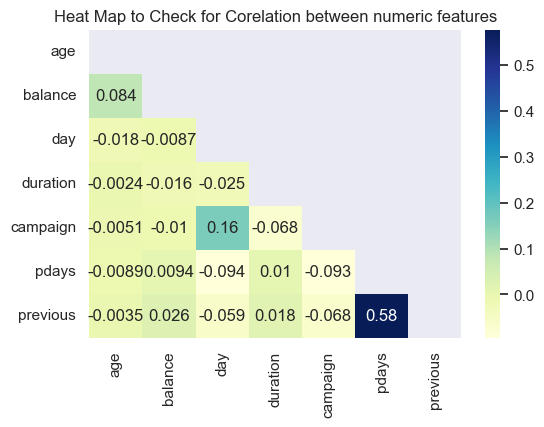

In [16]:
# Heat Map to Check for Corelation between numeric features
plt.figure(figsize=(6, 4)) # Augmenter figsize en cas de problème de visualisation
mask = np.triu(np.ones_like(corr_df.corr(method='pearson')))
sns.set(rc = {'figure.figsize':(26, 24)})
sns.heatmap(corr_df.corr(method='pearson'), cmap="YlGnBu", annot=True, mask=mask)
plt.title("Heat Map to Check for Corelation between numeric features");